In [1]:
import pandas as pd
from matplotlib.pyplot import scatter

file_path = "GlobalLandTemperaturesByMajorCity.csv"
df = pd.read_csv(file_path, encoding="latin1", on_bad_lines="skip")

In [2]:
print("Nie ma warszawy w bazie danych")
berlin = df[df['City'] == 'Berlin']
print(berlin)

Nie ma warszawy w bazie danych
               dt  AverageTemperature  AverageTemperatureUncertainty    City  \
24500  1743-11-01               6.326                          1.601  Berlin   
24501  1743-12-01                 NaN                            NaN  Berlin   
24502  1744-01-01                 NaN                            NaN  Berlin   
24503  1744-02-01                 NaN                            NaN  Berlin   
24504  1744-03-01                 NaN                            NaN  Berlin   
...           ...                 ...                            ...     ...   
27734  2013-05-01              14.139                          0.196  Berlin   
27735  2013-06-01              17.473                          0.236  Berlin   
27736  2013-07-01              20.901                          0.161  Berlin   
27737  2013-08-01              19.335                          0.265  Berlin   
27738  2013-09-01                 NaN                            NaN  Berlin   

       C

In [3]:
berlin['dt'] = pd.to_datetime(berlin['dt'])
berlin = berlin[(berlin['dt'].dt.year >= 1970) & (berlin['dt'].dt.year <= 2020)]
berlin = berlin[berlin['AverageTemperature'].notna()]

print(berlin)

              dt  AverageTemperature  AverageTemperatureUncertainty    City  \
27214 1970-01-01              -4.196                          0.283  Berlin   
27215 1970-02-01              -1.767                          0.456  Berlin   
27216 1970-03-01               1.589                          0.398  Berlin   
27217 1970-04-01               6.489                          0.328  Berlin   
27218 1970-05-01              12.787                          0.192  Berlin   
...          ...                 ...                            ...     ...   
27733 2013-04-01               9.088                          0.295  Berlin   
27734 2013-05-01              14.139                          0.196  Berlin   
27735 2013-06-01              17.473                          0.236  Berlin   
27736 2013-07-01              20.901                          0.161  Berlin   
27737 2013-08-01              19.335                          0.265  Berlin   

       Country Latitude Longitude  
27214  Germany 

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_19768\642799749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlin['dt'] = pd.to_datetime(berlin['dt'])


In [4]:
berlin['year'] = berlin['dt'].dt.year
sredniatemp = berlin.groupby('year')['AverageTemperature'].mean().reset_index()
print(sredniatemp)

    year  AverageTemperature
0   1970            8.427333
1   1971            9.542417
2   1972            8.882583
3   1973            9.238750
4   1974            9.893750
5   1975           10.082417
6   1976            9.152083
7   1977            9.535917
8   1978            8.860333
9   1979            8.530417
10  1980            8.262750
11  1981            9.181000
12  1982           10.078167
13  1983           10.211417
14  1984            8.937083
15  1985            8.460917
16  1986            8.783167
17  1987            8.090667
18  1988           10.023250
19  1989           10.720167
20  1990           10.710917
21  1991            9.358250
22  1992           10.375500
23  1993            9.344583
24  1994           10.430917
25  1995            9.753333
26  1996            7.883167
27  1997            9.725917
28  1998           10.050833
29  1999           10.583583
30  2000           10.963667
31  2001            9.690250
32  2002           10.264417
33  2003      

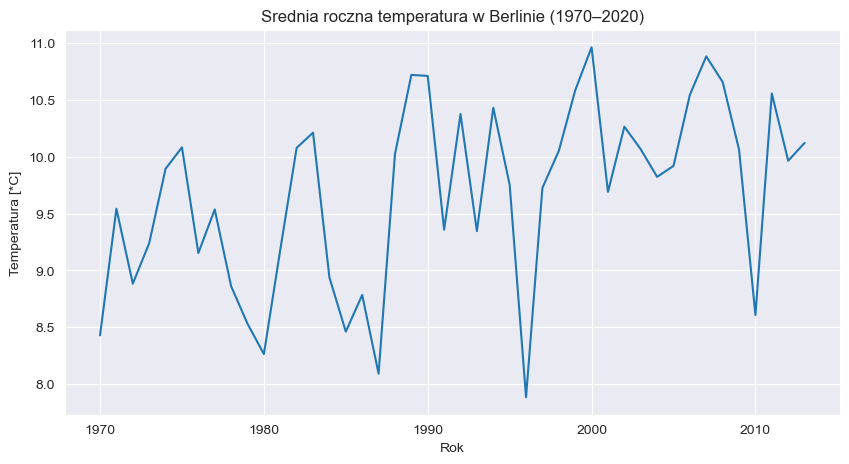

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=sredniatemp, x='year', y='AverageTemperature')
plt.title('Srednia roczna temperatura w Berlinie (1970–2020)')
plt.xlabel('Rok')
plt.ylabel('Temperatura [*C]')
plt.show()

In [6]:
srednia7090 = sredniatemp[(sredniatemp['year'] >= 1970) & sredniatemp['year'] <= 1990]['AverageTemperature'].mean()
srednia0020 = sredniatemp[(sredniatemp['year'] >= 2000) & sredniatemp['year'] <= 2020]['AverageTemperature'].mean()
roznica = srednia0020 - srednia7090
print(f"Roznica miedzy temp 2000-2020 a 1970-1900 wynosi: {roznica}*C")

Roznica miedzy temp 2000-2020 a 1970-1900 wynosi: 0.0*C


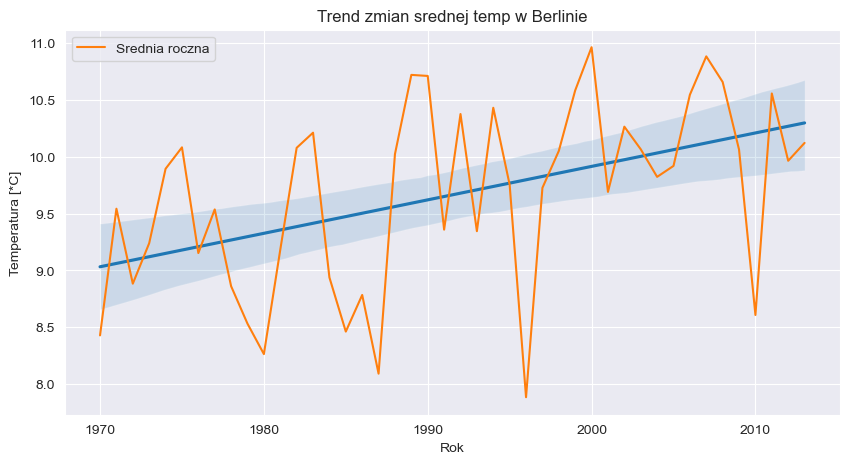

In [7]:
plt.figure(figsize=(10, 5))
sns.regplot(data=sredniatemp, x='year', y='AverageTemperature', scatter=False)
sns.lineplot(data=sredniatemp, x='year', y='AverageTemperature', label='Srednia roczna')
plt.title('Trend zmian srednej temp w Berlinie')
plt.xlabel('Rok')
plt.ylabel('Temperatura [*C]')
plt.show()